In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density

In [3]:
clu1 = pd.read_csv('../Catalogues/NGC5822_8_Pop1.csv')
clu1

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,225.442108,-55.148990,5881604188883544576,1.2438,-7.670,-5.493,31,1.535,NaN,0.917,14.326471,14.695655,13.779744,0.915911,-18.57,-36.224959,225.442167,-55.148965,1.284711
1,225.686351,-55.031650,5881612190342982784,1.1881,-7.819,-5.619,31,1.604,NaN,0.900,12.566382,12.794354,12.190967,0.603388,NaN,-36.066614,225.686412,-55.031625,1.217252
2,225.366839,-55.068265,5881617108146265088,1.1905,-7.601,-5.641,31,1.543,NaN,0.991,14.009442,14.363049,13.482981,0.880068,-39.67,-36.164123,225.366898,-55.068240,1.231306
3,225.548609,-55.043570,5881622532624231936,1.1740,-7.527,-5.648,31,1.585,NaN,0.923,12.961983,13.230419,12.532622,0.697797,-30.59,-36.104980,225.548668,-55.043545,1.205017
4,225.605571,-54.861117,5881626007319228160,1.2198,-7.673,-5.630,31,1.532,NaN,0.883,14.197813,14.571778,13.651608,0.920171,-25.21,-35.922417,225.605630,-54.861092,1.260643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,225.273971,-54.023293,5899725343078896768,1.1929,-7.745,-5.232,31,1.502,NaN,0.934,15.029718,15.467322,14.412708,1.054614,NaN,-35.201609,225.274030,-54.023270,1.234098
489,225.368094,-53.982357,5899726957986622464,1.2863,-7.574,-5.360,31,1.473,NaN,1.039,15.653814,16.171974,14.974668,1.197307,NaN,-35.144214,225.368151,-53.982333,1.327632
490,225.284235,-53.956634,5899727920059348352,1.2073,-7.726,-5.410,31,1.462,NaN,0.935,10.618663,11.172698,9.912421,1.260277,-24.84,-35.136912,225.284293,-53.956610,1.233105
491,225.097116,-53.928207,5899730428320333056,1.1873,-7.600,-5.177,31,1.553,NaN,0.959,13.790409,14.111759,13.268011,0.843748,-32.67,-35.147965,225.097174,-53.928184,1.228292


In [4]:
clu2 = pd.read_csv('../Catalogues/NGC5822_9_Pop2.csv')
clu2

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,226.540815,-56.317269,5880538895205342848,1.2212,-7.561,-3.855,95,NaN,1.2681,1.020,20.414282,21.562517,19.130104,2.432413,NaN,-37.108574,226.540876,-56.317251,1.178051
1,226.486014,-56.259646,5880539999013530240,1.3248,-6.493,-4.649,95,NaN,1.2593,1.095,20.303038,21.424482,18.701237,2.723246,NaN,-37.064888,226.486066,-56.259625,1.279951
2,227.291515,-56.203286,5880553017058278656,1.2268,-6.955,-4.249,95,NaN,1.3698,1.040,19.986824,21.398617,18.599062,2.799555,NaN,-36.859565,227.291570,-56.203267,1.212646
3,227.336485,-56.170772,5880553193167640576,1.2236,-6.473,-6.232,31,1.537,NaN,1.060,13.967035,14.326902,13.421547,0.905355,-21.07,-36.820520,227.336537,-56.170745,1.264165
4,227.171053,-56.254555,5880553983435241088,1.3605,-6.446,-4.474,95,NaN,1.2908,1.153,20.552470,22.385824,19.490551,2.895273,NaN,-36.930437,227.171105,-56.254536,1.324254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,223.973185,-53.107410,5900018947033104128,1.1424,-7.406,-5.137,31,1.538,NaN,1.053,14.113292,14.472841,13.574273,0.898568,-25.16,-34.608718,223.973240,-53.107387,1.183518
1715,223.710172,-53.172853,5900020527581192960,1.2110,-8.580,-7.065,31,1.576,NaN,1.071,13.198145,13.479146,12.748587,0.730559,-48.30,-34.725084,223.710236,-53.172821,1.252005
1716,223.917602,-53.002225,5900028980051536256,1.1630,-8.963,-6.040,95,NaN,1.4453,1.039,20.484623,20.184137,19.717861,0.466276,NaN,-34.521718,223.917668,-53.002198,1.168368
1717,226.743821,-52.695258,5900279977968957696,1.1428,-6.872,-5.097,31,1.527,NaN,0.972,14.595971,14.982469,14.036048,0.946421,-32.72,-33.656514,226.743871,-52.695235,1.184279


In [5]:
df_cg =  pd.read_csv('../Catalogues/NGC5822_CG2020.csv')
df_cg

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA_icrs,_DE_icrs
0,228.119452,-54.267266,5887531312461625344,1.1430,-7.070,-5.544,NaN,16.6764,1.5860,0.9,NGC_5822,228.119504,-54.267243
1,227.344331,-54.344931,5887550480850929664,1.1296,-7.322,-5.940,NaN,16.0444,1.3052,1.0,NGC_5822,227.344385,-54.344905
2,227.265604,-54.511369,5887547044876178688,1.1887,-7.041,-5.326,NaN,15.7437,1.3891,0.8,NGC_5822,227.265657,-54.511346
3,228.153565,-54.275186,5887528391883859840,1.1303,-8.053,-5.830,NaN,16.4127,1.4811,0.1,NGC_5822,228.153624,-54.275160
4,226.991796,-54.225306,5887755063075968896,1.1424,-7.264,-5.906,NaN,13.4089,0.7756,0.9,NGC_5822,226.991849,-54.225281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,225.724351,-55.106111,5881608002814888192,1.0504,-6.906,-5.021,NaN,17.4317,1.9568,0.3,NGC_5822,225.724403,-55.106089
792,225.336022,-54.932646,5881627587867166720,1.2031,-7.269,-5.894,NaN,14.8948,1.0686,1.0,NGC_5822,225.336076,-54.932621
793,225.605573,-54.861117,5881626007319228160,1.1871,-7.626,-5.675,NaN,14.2106,0.9349,1.0,NGC_5822,225.605630,-54.861092
794,225.697085,-55.529861,5881404073408798720,1.0413,-8.241,-5.495,NaN,12.9769,0.9158,0.1,NGC_5822,225.697148,-55.529837


In [6]:
df_vg =  pd.read_csv('../Catalogues/NGC5822_vG2023.csv')
df_vg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
0,NGC_5822,5881692149823656320,224.731239,-54.566271,1.1099,-7.637,-5.249,14.223904,14.590719,13.684692,1.00
1,NGC_5822,5881693146252823040,225.029198,-54.642280,1.2323,-7.615,-5.588,13.173482,13.473589,12.706505,1.00
2,NGC_5822,5881693008813852032,225.093020,-54.639486,1.1770,-7.513,-5.336,17.276005,18.127857,16.374056,1.00
3,NGC_5822,5881621849790430720,225.256861,-54.944673,1.2361,-7.625,-4.914,10.945331,11.127864,10.621691,1.00
4,NGC_5822,5881581129144018944,224.939856,-55.470265,1.1691,-7.361,-6.179,17.633880,18.448076,16.705523,0.17
...,...,...,...,...,...,...,...,...,...,...,...
3806,NGC_5822,5887682941959525632,225.462268,-54.661084,1.2073,-7.094,-4.968,19.999956,20.675339,18.942724,0.11
3807,NGC_5822,5887513479716081408,228.244040,-54.481390,1.2680,-7.562,-4.841,19.671330,20.907232,18.590193,0.07
3808,NGC_5822,5887644802678111616,225.789618,-54.490146,1.2263,-7.360,-5.264,14.942392,15.364985,14.344611,1.00
3809,NGC_5822,5887409644592719744,226.436096,-55.149314,0.8496,-7.272,-5.059,19.407978,20.748910,18.374445,0.12


### Taking only the members of CG+2020 and vG+2023 that has Pmemb>0.7

In [7]:
kk, = np.where(df_cg.Proba >= 0.7)

In [8]:
dfcg = df_cg.iloc[kk]

In [9]:
jj, = np.where(df_vg.Pmemb >= 0.7)

In [10]:
dfvg = df_vg.iloc[jj]

In [11]:
dfcg

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA_icrs,_DE_icrs
0,228.119452,-54.267266,5887531312461625344,1.1430,-7.070,-5.544,NaN,16.6764,1.5860,0.9,NGC_5822,228.119504,-54.267243
1,227.344331,-54.344931,5887550480850929664,1.1296,-7.322,-5.940,NaN,16.0444,1.3052,1.0,NGC_5822,227.344385,-54.344905
2,227.265604,-54.511369,5887547044876178688,1.1887,-7.041,-5.326,NaN,15.7437,1.3891,0.8,NGC_5822,227.265657,-54.511346
4,226.991796,-54.225306,5887755063075968896,1.1424,-7.264,-5.906,NaN,13.4089,0.7756,0.9,NGC_5822,226.991849,-54.225281
5,225.697237,-53.948040,5887741834581042176,1.1561,-7.678,-5.521,NaN,14.3526,0.9471,1.0,NGC_5822,225.697294,-53.948016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,225.316924,-54.975930,5881626625794417920,1.2069,-7.638,-5.643,NaN,14.2886,0.9256,1.0,NGC_5822,225.316981,-54.975906
788,225.548611,-55.043569,5881622532624231936,1.1534,-7.426,-5.718,NaN,12.9747,0.7030,1.0,NGC_5822,225.548667,-55.043545
789,225.686353,-55.031650,5881612190342982784,1.1775,-7.652,-5.677,-19.10562,12.5780,0.6127,1.0,NGC_5822,225.686411,-55.031625
792,225.336022,-54.932646,5881627587867166720,1.2031,-7.269,-5.894,NaN,14.8948,1.0686,1.0,NGC_5822,225.336076,-54.932621


In [12]:
dfvg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
0,NGC_5822,5881692149823656320,224.731239,-54.566271,1.1099,-7.637,-5.249,14.223904,14.590719,13.684692,1.00
1,NGC_5822,5881693146252823040,225.029198,-54.642280,1.2323,-7.615,-5.588,13.173482,13.473589,12.706505,1.00
2,NGC_5822,5881693008813852032,225.093020,-54.639486,1.1770,-7.513,-5.336,17.276005,18.127857,16.374056,1.00
3,NGC_5822,5881621849790430720,225.256861,-54.944673,1.2361,-7.625,-4.914,10.945331,11.127864,10.621691,1.00
9,NGC_5822,5881663734314222848,224.529052,-54.907023,1.2427,-8.045,-5.691,15.783429,16.332071,15.084052,0.94
...,...,...,...,...,...,...,...,...,...,...,...
3788,NGC_5822,5887644076778836992,225.766634,-54.552180,1.2115,-7.631,-5.502,17.686186,18.633373,16.712296,0.98
3790,NGC_5822,5887682907633247232,225.485704,-54.661399,1.2133,-7.699,-5.579,13.759797,14.118023,13.219545,1.00
3792,NGC_5822,5887644802678106752,225.802585,-54.496725,1.0860,-7.484,-5.220,16.826729,17.568169,15.986682,1.00
3808,NGC_5822,5887644802678111616,225.789618,-54.490146,1.2263,-7.360,-5.264,14.942392,15.364985,14.344611,1.00


### The cluster we believe is NGC2539 in our sample is Clu1, so we make a crossmatch of it with this literature data

Match with Cantat-Gaudin+2020.

In [32]:
ra1 = clu1.RA_ICRS
dec1 = clu1.DE_ICRS

ra2 = dfcg.RA_ICRS
dec2 = dfcg.DE_ICRS

In [33]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from Cantat-Gaudin+2020
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [34]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [35]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

Visualizing the results.

In [36]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [37]:
clu1.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,225.442108,-55.148990,5881604188883544576,1.2438,-7.670,-5.493,31,1.535,NaN,0.917,14.326471,14.695655,13.779744,0.915911,-18.57,-36.224959,225.442167,-55.148965,1.284711
1,225.686351,-55.031650,5881612190342982784,1.1881,-7.819,-5.619,31,1.604,NaN,0.900,12.566382,12.794354,12.190967,0.603388,NaN,-36.066614,225.686412,-55.031625,1.217252
2,225.366839,-55.068265,5881617108146265088,1.1905,-7.601,-5.641,31,1.543,NaN,0.991,14.009442,14.363049,13.482981,0.880068,-39.67,-36.164123,225.366898,-55.068240,1.231306
3,225.548609,-55.043570,5881622532624231936,1.1740,-7.527,-5.648,31,1.585,NaN,0.923,12.961983,13.230419,12.532622,0.697797,-30.59,-36.104980,225.548668,-55.043545,1.205017
4,225.605571,-54.861117,5881626007319228160,1.2198,-7.673,-5.630,31,1.532,NaN,0.883,14.197813,14.571778,13.651608,0.920171,-25.21,-35.922417,225.605630,-54.861092,1.260643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,225.273971,-54.023293,5899725343078896768,1.1929,-7.745,-5.232,31,1.502,NaN,0.934,15.029718,15.467322,14.412708,1.054614,NaN,-35.201609,225.274030,-54.023270,1.234098
489,225.368094,-53.982357,5899726957986622464,1.2863,-7.574,-5.360,31,1.473,NaN,1.039,15.653814,16.171974,14.974668,1.197307,NaN,-35.144214,225.368151,-53.982333,1.327632
490,225.284235,-53.956634,5899727920059348352,1.2073,-7.726,-5.410,31,1.462,NaN,0.935,10.618663,11.172698,9.912421,1.260277,-24.84,-35.136912,225.284293,-53.956610,1.233105
491,225.097116,-53.928207,5899730428320333056,1.1873,-7.600,-5.177,31,1.553,NaN,0.959,13.790409,14.111759,13.268011,0.843748,-32.67,-35.147965,225.097174,-53.928184,1.228292


In [38]:
dfcg.iloc[matched_idx_catalog2]

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA_icrs,_DE_icrs
782,225.442109,-55.148989,5881604188883544576,1.2510,-7.724,-5.551,NaN,14.3380,0.9283,1.0,NGC_5822,225.442168,-55.148965
789,225.686353,-55.031650,5881612190342982784,1.1775,-7.652,-5.677,-19.10562,12.5780,0.6127,1.0,NGC_5822,225.686411,-55.031625
786,225.366841,-55.068265,5881617108146265088,1.2014,-7.699,-5.701,NaN,14.0198,0.8911,1.0,NGC_5822,225.366899,-55.068240
788,225.548611,-55.043569,5881622532624231936,1.1534,-7.426,-5.718,NaN,12.9747,0.7030,1.0,NGC_5822,225.548667,-55.043545
793,225.605573,-54.861117,5881626007319228160,1.1871,-7.626,-5.675,NaN,14.2106,0.9349,1.0,NGC_5822,225.605630,-54.861092
...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,225.273973,-54.023293,5899725343078896768,1.1796,-7.815,-5.143,NaN,15.0462,1.0712,0.9,NGC_5822,225.274030,-54.023270
746,225.368096,-53.982356,5899726957986622464,1.2778,-7.298,-5.625,NaN,15.6633,1.2079,1.0,NGC_5822,225.368149,-53.982332
760,225.284237,-53.956633,5899727920059348352,1.1724,-7.813,-5.617,-27.26408,10.6167,1.2697,0.8,NGC_5822,225.284294,-53.956609
744,225.097118,-53.928206,5899730428320333056,1.1482,-7.539,-5.307,NaN,13.7998,0.8446,1.0,NGC_5822,225.097173,-53.928183


(222.5, 229.5)

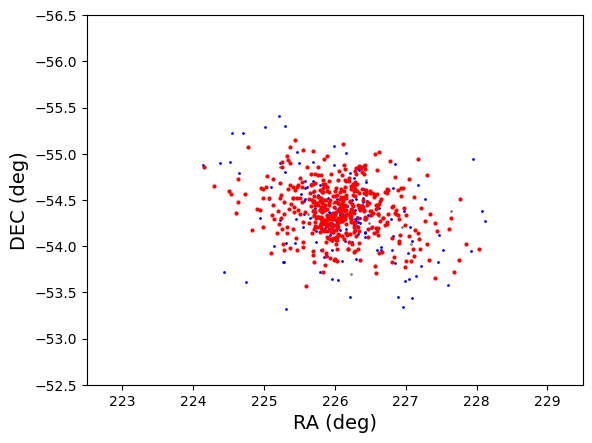

In [39]:
fig, ax = plt.subplots()

ax.scatter(clu1.RA_ICRS, clu1.DE_ICRS, s=1, c='grey')
ax.scatter(dfcg.RA_ICRS, dfcg.DE_ICRS, s=1, c='b')
ax.scatter(clu1.iloc[matched_idx_catalog1].RA_ICRS, clu1.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-52.5,-56.5)
ax.set_xlim(222.5,229.5)

Informations:

- Membership by GMM: 493
- Membership by Cantat-Gaudin(Pmemb>0.7): 634
- Membership crossmatch: 477

In [21]:
population1 = clu1.iloc[matched_idx_catalog1]

Match with vanGroeningen+2020.

In [77]:
ra1 = clu1.RA_ICRS
dec1 = clu1.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [78]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vanGroeningen+2020
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [79]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [80]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

Visualizing the results.

In [81]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [82]:
clu1.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,225.442108,-55.148990,5881604188883544576,1.2438,-7.670,-5.493,31,1.535,NaN,0.917,14.326471,14.695655,13.779744,0.915911,-18.57,-36.224959,225.442167,-55.148965,1.284711
1,225.686351,-55.031650,5881612190342982784,1.1881,-7.819,-5.619,31,1.604,NaN,0.900,12.566382,12.794354,12.190967,0.603388,NaN,-36.066614,225.686412,-55.031625,1.217252
2,225.366839,-55.068265,5881617108146265088,1.1905,-7.601,-5.641,31,1.543,NaN,0.991,14.009442,14.363049,13.482981,0.880068,-39.67,-36.164123,225.366898,-55.068240,1.231306
3,225.548609,-55.043570,5881622532624231936,1.1740,-7.527,-5.648,31,1.585,NaN,0.923,12.961983,13.230419,12.532622,0.697797,-30.59,-36.104980,225.548668,-55.043545,1.205017
4,225.605571,-54.861117,5881626007319228160,1.2198,-7.673,-5.630,31,1.532,NaN,0.883,14.197813,14.571778,13.651608,0.920171,-25.21,-35.922417,225.605630,-54.861092,1.260643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,225.273971,-54.023293,5899725343078896768,1.1929,-7.745,-5.232,31,1.502,NaN,0.934,15.029718,15.467322,14.412708,1.054614,NaN,-35.201609,225.274030,-54.023270,1.234098
489,225.368094,-53.982357,5899726957986622464,1.2863,-7.574,-5.360,31,1.473,NaN,1.039,15.653814,16.171974,14.974668,1.197307,NaN,-35.144214,225.368151,-53.982333,1.327632
490,225.284235,-53.956634,5899727920059348352,1.2073,-7.726,-5.410,31,1.462,NaN,0.935,10.618663,11.172698,9.912421,1.260277,-24.84,-35.136912,225.284293,-53.956610,1.233105
491,225.097116,-53.928207,5899730428320333056,1.1873,-7.600,-5.177,31,1.553,NaN,0.959,13.790409,14.111759,13.268011,0.843748,-32.67,-35.147965,225.097174,-53.928184,1.228292


In [28]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
574,NGC_5822,5881604188883544576,225.442108,-55.148990,1.2438,-7.670,-5.493,14.326471,14.695655,13.779744,1.0
380,NGC_5822,5881612190342982784,225.686351,-55.031650,1.1881,-7.819,-5.619,12.566382,12.794354,12.190967,1.0
432,NGC_5822,5881617108146265088,225.366839,-55.068265,1.1905,-7.601,-5.641,14.009442,14.363049,13.482981,1.0
14,NGC_5822,5881622532624231936,225.548609,-55.043570,1.1740,-7.527,-5.648,12.961983,13.230419,12.532622,1.0
139,NGC_5822,5881626007319228160,225.605571,-54.861117,1.2198,-7.673,-5.630,14.197813,14.571778,13.651608,1.0
...,...,...,...,...,...,...,...,...,...,...,...
461,NGC_5822,5899725343078896768,225.273971,-54.023293,1.1929,-7.745,-5.232,15.029718,15.467322,14.412708,1.0
464,NGC_5822,5899726957986622464,225.368094,-53.982357,1.2863,-7.574,-5.360,15.653814,16.171974,14.974668,1.0
491,NGC_5822,5899727920059348352,225.284235,-53.956634,1.2073,-7.726,-5.410,10.618663,11.172698,9.912421,1.0
191,NGC_5822,5899730428320333056,225.097116,-53.928207,1.1873,-7.600,-5.177,13.790409,14.111759,13.268011,1.0


(222.5, 229.5)

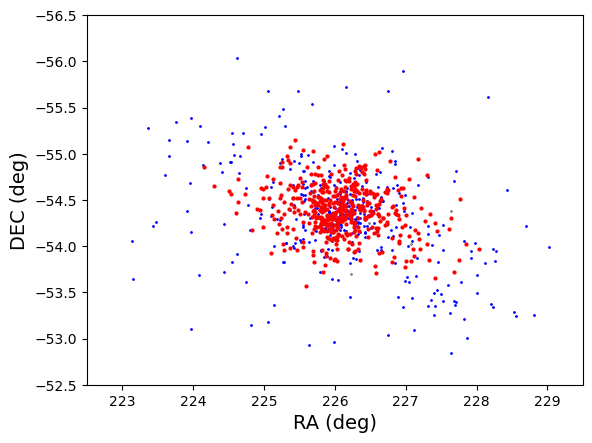

In [31]:
fig, ax = plt.subplots()

ax.scatter(clu1.RA_ICRS, clu1.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(clu1.iloc[matched_idx_catalog1].RA_ICRS, clu1.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-52.5,-56.5)
ax.set_xlim(222.5,229.5)

Informations:

- Membership by GMM: 493
- Membership by van Groeningen(Pmemb>0.7): 850
- Membership crossmatch: 486

In [83]:
population2 = clu1.iloc[matched_idx_catalog1]

### The second population we have chosen is thought to have members from NGC2539 that the GMM couldn't identify as belonging to the cluster. In here we test this hipotesis

Match with Cantat-Gaudin+2020.

In [13]:
ra1 = clu2.RA_ICRS
dec1 = clu2.DE_ICRS

ra2 = dfcg.RA_ICRS
dec2 = dfcg.DE_ICRS

In [14]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from Cantat-Gaudin+2020
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [15]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [16]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

Visualizing the results.

In [17]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [55]:
clu2.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
350,225.211480,-55.407179,5881577010328408448,1.2269,-7.684,-5.849,31,1.436,NaN,1.036,16.297575,16.922230,15.512806,1.409424,NaN,-36.512701,225.211540,-55.407153,1.258643
364,225.008290,-55.293064,5881590406272130432,1.2138,-7.750,-5.789,31,1.545,NaN,0.947,13.875116,14.223661,13.356272,0.867390,-21.70,-36.446101,225.008351,-55.293039,1.254483
385,225.296328,-55.295683,5881601474464060928,1.2164,-7.437,-5.602,31,1.410,NaN,1.036,15.994070,16.715670,15.174198,1.541472,NaN,-36.391385,225.296386,-55.295658,1.253359
442,224.547057,-55.223312,5881638170667305728,1.1972,-7.911,-5.590,31,1.462,NaN,1.018,15.908957,16.462141,15.190453,1.271688,NaN,-36.473067,224.547118,-55.223288,1.237970
443,224.709989,-55.220734,5881640678928441728,1.1506,-7.690,-5.702,31,1.521,NaN,1.048,14.673061,15.068972,14.087427,0.981545,NaN,-36.437944,224.710049,-55.220708,1.191539
457,224.376359,-54.899568,5881662875325140224,1.1876,-8.076,-5.456,95,NaN,1.4260,1.014,16.389484,17.048779,15.615577,1.433202,NaN,-36.204550,224.376422,-54.899544,1.218635
477,225.300998,-54.801856,5881675687140463616,1.1331,-7.208,-4.750,31,1.432,NaN,1.062,16.636160,17.281542,15.837957,1.443584,NaN,-35.927234,225.301053,-54.801835,1.163982
489,225.073030,-54.505658,5881696066830832640,1.1612,-8.058,-5.584,31,1.460,NaN,1.036,15.368514,15.921715,14.650129,1.271586,NaN,-35.694892,225.073091,-54.505633,1.202078
944,225.990096,-55.088819,5887424449325573248,1.2884,-7.690,-5.731,31,1.622,NaN,1.312,11.867349,12.056363,11.528721,0.527642,-13.14,-36.060681,225.990156,-55.088793,1.332487
1030,226.825444,-54.627320,5887463967368947072,1.1378,-7.160,-5.719,31,1.392,NaN,1.026,17.055115,17.831432,16.191862,1.639570,NaN,-35.463825,226.825499,-54.627295,1.167787


In [56]:
dfcg.iloc[matched_idx_catalog2]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA_icrs,_DE_icrs
776,225.211482,-55.407179,5881577010328408448,1.2297,-7.658,-5.771,NaN,16.3104,1.4164,1.0,NGC_5822,225.211540,-55.407154
775,225.008292,-55.293064,5881590406272130432,1.2123,-7.662,-5.806,NaN,13.8879,0.8754,0.8,NGC_5822,225.008350,-55.293039
784,225.296330,-55.295683,5881601474464060928,1.1609,-7.364,-5.500,NaN,16.0053,1.5534,1.0,NGC_5822,225.296386,-55.295659
53,224.547059,-55.223312,5881638170667305728,1.1843,-7.934,-5.538,NaN,15.9249,1.2869,0.7,NGC_5822,224.547119,-55.223288
55,224.709991,-55.220733,5881640678928441728,1.1458,-7.620,-5.831,NaN,14.6833,0.9946,0.8,NGC_5822,224.710048,-55.220708
101,224.376361,-54.899567,5881662875320798848,1.1919,-8.047,-5.591,NaN,16.4069,1.4520,0.7,NGC_5822,224.376422,-54.899543
104,225.300999,-54.801855,5881675687140463616,1.1636,-7.207,-4.948,NaN,16.6533,1.4442,0.7,NGC_5822,225.301053,-54.801834
145,225.073032,-54.505657,5881696066830832640,1.2069,-8.164,-5.579,NaN,15.3817,1.2817,0.8,NGC_5822,225.073092,-54.505633
698,225.990098,-55.088818,5887424449325573248,1.2472,-7.519,-5.829,NaN,11.8703,0.5349,1.0,NGC_5822,225.990155,-55.088793
720,226.825445,-54.627319,5887463967368947072,1.1849,-7.236,-5.957,NaN,17.0769,1.6624,0.7,NGC_5822,226.825499,-54.627294


(222.5, 229.5)

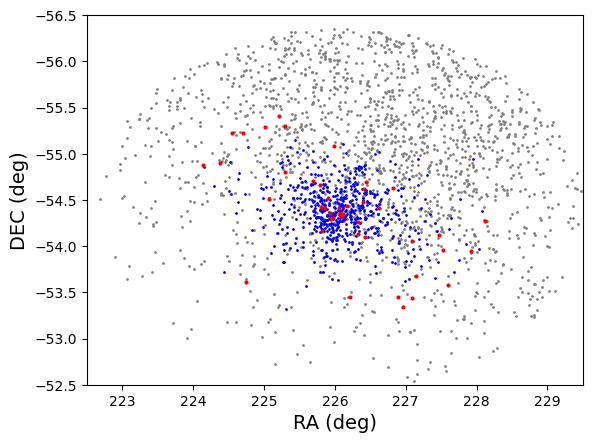

In [48]:
fig, ax = plt.subplots()

ax.scatter(clu2.RA_ICRS, clu2.DE_ICRS, s=1, c='grey')
ax.scatter(dfcg.RA_ICRS, dfcg.DE_ICRS, s=1, c='b')
ax.scatter(clu2.iloc[matched_idx_catalog1].RA_ICRS, clu2.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-52.5,-56.5)
ax.set_xlim(222.5,229.5)

Informations:
- Membership crossmatch: 45

In [18]:
population1_lost = clu2.iloc[matched_idx_catalog1]

Match with vanGroeningen+2020.

In [19]:
ra1 = clu2.RA_ICRS
dec1 = clu2.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [20]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vanGroeningen+2020
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [21]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [22]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

Visualizing the results.

In [23]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [63]:
clu2.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
45,226.964782,-55.900104,5880575114680639488,1.1518,-7.280,-5.884,31,1.395,NaN,1.017,16.938236,17.682375,16.052890,1.629484,NaN,-36.635825,226.964840,-55.900078,1.181979
206,225.478188,-55.681735,5881380781843703040,1.2525,-7.781,-5.683,31,1.584,NaN,0.916,12.982288,13.249472,12.548177,0.701295,-17.67,-36.717506,225.478249,-55.681710,1.284755
217,226.153399,-55.717696,5881387207115290368,1.1593,-7.530,-5.365,31,1.445,NaN,1.005,16.106497,16.707300,15.368125,1.339175,NaN,-36.619735,226.153458,-55.717672,1.191565
243,225.681373,-55.541256,5881404043388082560,1.2967,-7.110,-5.223,31,1.548,NaN,0.920,13.714863,14.057667,13.201783,0.855884,26.90,-36.545939,225.681429,-55.541233,1.337292
263,224.623523,-56.032550,5881458778464898944,1.1517,-7.719,-5.169,31,1.599,NaN,0.909,12.289694,12.524664,11.897099,0.627565,-27.72,-37.214618,224.623584,-56.032527,1.180923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,224.746220,-53.610175,5899796708259124352,1.2995,-7.758,-5.572,31,1.526,NaN,0.930,14.170815,14.560180,13.609451,0.950728,4.13,-34.920681,224.746279,-53.610151,1.340445
1692,225.055878,-53.182328,5899835775283387136,1.1455,-7.159,-5.756,31,1.556,NaN,0.984,13.477468,13.800722,12.986613,0.814109,-56.52,-34.455467,225.055931,-53.182302,1.186468
1695,224.813303,-53.151743,5899845396010785920,1.2183,-7.914,-5.132,31,1.533,NaN,0.947,14.380452,14.750266,13.825043,0.925223,0.18,-34.476388,224.813362,-53.151720,1.259558
1700,225.981860,-52.964491,5899886765128211200,1.2670,-7.827,-5.348,31,1.574,NaN,0.978,13.357611,13.645534,12.906324,0.739209,-32.35,-34.062790,225.981918,-52.964467,1.308210


In [64]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
3810,NGC_5822,5880575114680639488,226.964782,-55.900104,1.1518,-7.280,-5.884,16.938236,17.682375,16.052890,0.77
1311,NGC_5822,5881380781843703040,225.478188,-55.681735,1.2525,-7.781,-5.683,12.982288,13.249472,12.548177,1.00
1284,NGC_5822,5881387207115290368,226.153399,-55.717696,1.1593,-7.530,-5.365,16.106497,16.707300,15.368125,1.00
2064,NGC_5822,5881404043388082560,225.681373,-55.541256,1.2967,-7.110,-5.223,13.714863,14.057667,13.201783,1.00
1537,NGC_5822,5881458778464898944,224.623523,-56.032550,1.1517,-7.719,-5.169,12.289694,12.524664,11.897099,0.97
...,...,...,...,...,...,...,...,...,...,...,...
1044,NGC_5822,5899796708259124352,224.746220,-53.610175,1.2995,-7.758,-5.572,14.170815,14.560180,13.609451,1.00
984,NGC_5822,5899835775283387136,225.055878,-53.182328,1.1455,-7.159,-5.756,13.477468,13.800722,12.986613,1.00
989,NGC_5822,5899845396010785920,224.813303,-53.151743,1.2183,-7.914,-5.132,14.380452,14.750266,13.825043,0.94
3759,NGC_5822,5899886765128211200,225.981860,-52.964491,1.2670,-7.827,-5.348,13.357611,13.645534,12.906324,1.00


(222.5, 229.5)

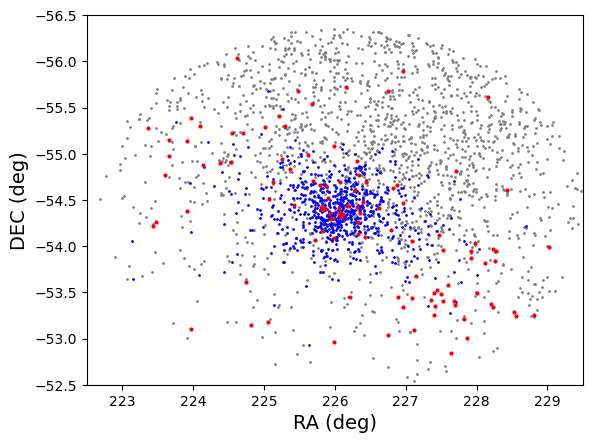

In [65]:
fig, ax = plt.subplots()

ax.scatter(clu2.RA_ICRS, clu2.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(clu2.iloc[matched_idx_catalog1].RA_ICRS, clu2.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-52.5,-56.5)
ax.set_xlim(222.5,229.5)

Informations:
- Membership crossmatch: 113

In [24]:
population2_lost = clu2.iloc[matched_idx_catalog1]

### Now we build an catalogue joining members of the crossmatches, both the primary members and the "lost ones"

- Members from the crossmatch with CG+2020.

In [67]:
population1

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,225.442108,-55.148990,5881604188883544576,1.2438,-7.670,-5.493,31,1.535,NaN,0.917,14.326471,14.695655,13.779744,0.915911,-18.57,-36.224959,225.442167,-55.148965,1.284711
1,225.686351,-55.031650,5881612190342982784,1.1881,-7.819,-5.619,31,1.604,NaN,0.900,12.566382,12.794354,12.190967,0.603388,NaN,-36.066614,225.686412,-55.031625,1.217252
2,225.366839,-55.068265,5881617108146265088,1.1905,-7.601,-5.641,31,1.543,NaN,0.991,14.009442,14.363049,13.482981,0.880068,-39.67,-36.164123,225.366898,-55.068240,1.231306
3,225.548609,-55.043570,5881622532624231936,1.1740,-7.527,-5.648,31,1.585,NaN,0.923,12.961983,13.230419,12.532622,0.697797,-30.59,-36.104980,225.548668,-55.043545,1.205017
4,225.605571,-54.861117,5881626007319228160,1.2198,-7.673,-5.630,31,1.532,NaN,0.883,14.197813,14.571778,13.651608,0.920171,-25.21,-35.922417,225.605630,-54.861092,1.260643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,225.273971,-54.023293,5899725343078896768,1.1929,-7.745,-5.232,31,1.502,NaN,0.934,15.029718,15.467322,14.412708,1.054614,NaN,-35.201609,225.274030,-54.023270,1.234098
489,225.368094,-53.982357,5899726957986622464,1.2863,-7.574,-5.360,31,1.473,NaN,1.039,15.653814,16.171974,14.974668,1.197307,NaN,-35.144214,225.368151,-53.982333,1.327632
490,225.284235,-53.956634,5899727920059348352,1.2073,-7.726,-5.410,31,1.462,NaN,0.935,10.618663,11.172698,9.912421,1.260277,-24.84,-35.136912,225.284293,-53.956610,1.233105
491,225.097116,-53.928207,5899730428320333056,1.1873,-7.600,-5.177,31,1.553,NaN,0.959,13.790409,14.111759,13.268011,0.843748,-32.67,-35.147965,225.097174,-53.928184,1.228292


(222.5, 229.5)

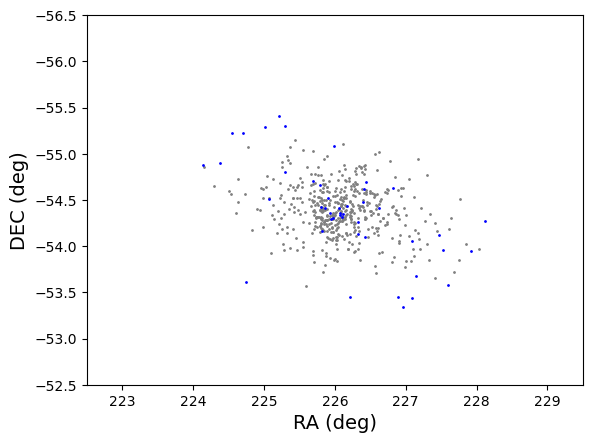

In [69]:
fig, ax = plt.subplots()

ax.scatter(population1.RA_ICRS, population1.DE_ICRS, s=1, c='grey')
ax.scatter(population1_lost.RA_ICRS, population1_lost.DE_ICRS, s=1, c='b')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-52.5,-56.5)
ax.set_xlim(222.5,229.5)

Verifying duplicates.

In [70]:
sky1 = SkyCoord(ra=population1.RA_ICRS, dec=population1.DE_ICRS,unit='degree')
sky2 = SkyCoord(ra=population1_lost.RA_ICRS, dec=population1_lost.DE_ICRS,unit='degree')

# Fazer o crossmatch
idx, d2d, _ = sky2.match_to_catalog_sky(sky1)

# Definir uma tolerância máxima para duplicatas
max_sep = 1.0 * u.arcsec
duplicates = d2d < max_sep

In [71]:
duplicates

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

(222.5, 229.5)

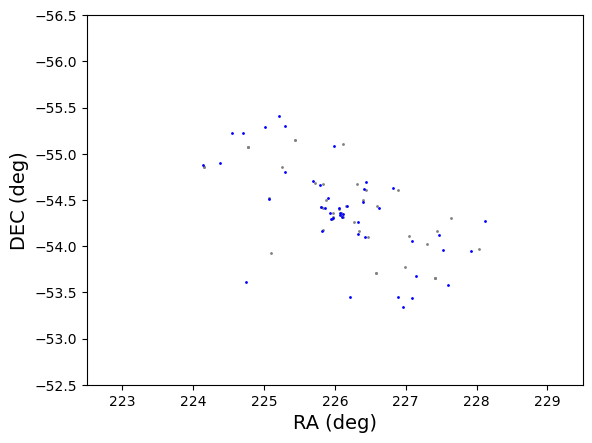

In [73]:
fig, ax = plt.subplots()

ax.scatter(population1.iloc[idx].RA_ICRS, population1.iloc[idx].DE_ICRS, s=1, c='grey')
ax.scatter(population1_lost.RA_ICRS, population1_lost.DE_ICRS, s=1, c='b')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-52.5,-56.5)
ax.set_xlim(222.5,229.5)

As expected, we have no duplicates in the limit of 1armin of separation. So we join the two catalogues to make one single.

In [74]:
#combined_catalog1 = pd.concat([population1, population1_lost], ignore_index=True)
#combined_catalog1.to_csv('Catalogues/NGC5822_GMM_Population1.csv', index=False)

- Members from the crossmatch with vG+2023.

In [85]:
population2

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,225.442108,-55.148990,5881604188883544576,1.2438,-7.670,-5.493,31,1.535,NaN,0.917,14.326471,14.695655,13.779744,0.915911,-18.57,-36.224959,225.442167,-55.148965,1.284711
1,225.686351,-55.031650,5881612190342982784,1.1881,-7.819,-5.619,31,1.604,NaN,0.900,12.566382,12.794354,12.190967,0.603388,NaN,-36.066614,225.686412,-55.031625,1.217252
2,225.366839,-55.068265,5881617108146265088,1.1905,-7.601,-5.641,31,1.543,NaN,0.991,14.009442,14.363049,13.482981,0.880068,-39.67,-36.164123,225.366898,-55.068240,1.231306
3,225.548609,-55.043570,5881622532624231936,1.1740,-7.527,-5.648,31,1.585,NaN,0.923,12.961983,13.230419,12.532622,0.697797,-30.59,-36.104980,225.548668,-55.043545,1.205017
4,225.605571,-54.861117,5881626007319228160,1.2198,-7.673,-5.630,31,1.532,NaN,0.883,14.197813,14.571778,13.651608,0.920171,-25.21,-35.922417,225.605630,-54.861092,1.260643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,225.273971,-54.023293,5899725343078896768,1.1929,-7.745,-5.232,31,1.502,NaN,0.934,15.029718,15.467322,14.412708,1.054614,NaN,-35.201609,225.274030,-54.023270,1.234098
489,225.368094,-53.982357,5899726957986622464,1.2863,-7.574,-5.360,31,1.473,NaN,1.039,15.653814,16.171974,14.974668,1.197307,NaN,-35.144214,225.368151,-53.982333,1.327632
490,225.284235,-53.956634,5899727920059348352,1.2073,-7.726,-5.410,31,1.462,NaN,0.935,10.618663,11.172698,9.912421,1.260277,-24.84,-35.136912,225.284293,-53.956610,1.233105
491,225.097116,-53.928207,5899730428320333056,1.1873,-7.600,-5.177,31,1.553,NaN,0.959,13.790409,14.111759,13.268011,0.843748,-32.67,-35.147965,225.097174,-53.928184,1.228292


In [86]:
population2_lost

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
45,226.964782,-55.900104,5880575114680639488,1.1518,-7.280,-5.884,31,1.395,NaN,1.017,16.938236,17.682375,16.052890,1.629484,NaN,-36.635825,226.964840,-55.900078,1.181979
206,225.478188,-55.681735,5881380781843703040,1.2525,-7.781,-5.683,31,1.584,NaN,0.916,12.982288,13.249472,12.548177,0.701295,-17.67,-36.717506,225.478249,-55.681710,1.284755
217,226.153399,-55.717696,5881387207115290368,1.1593,-7.530,-5.365,31,1.445,NaN,1.005,16.106497,16.707300,15.368125,1.339175,NaN,-36.619735,226.153458,-55.717672,1.191565
243,225.681373,-55.541256,5881404043388082560,1.2967,-7.110,-5.223,31,1.548,NaN,0.920,13.714863,14.057667,13.201783,0.855884,26.90,-36.545939,225.681429,-55.541233,1.337292
263,224.623523,-56.032550,5881458778464898944,1.1517,-7.719,-5.169,31,1.599,NaN,0.909,12.289694,12.524664,11.897099,0.627565,-27.72,-37.214618,224.623584,-56.032527,1.180923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,224.746220,-53.610175,5899796708259124352,1.2995,-7.758,-5.572,31,1.526,NaN,0.930,14.170815,14.560180,13.609451,0.950728,4.13,-34.920681,224.746279,-53.610151,1.340445
1692,225.055878,-53.182328,5899835775283387136,1.1455,-7.159,-5.756,31,1.556,NaN,0.984,13.477468,13.800722,12.986613,0.814109,-56.52,-34.455467,225.055931,-53.182302,1.186468
1695,224.813303,-53.151743,5899845396010785920,1.2183,-7.914,-5.132,31,1.533,NaN,0.947,14.380452,14.750266,13.825043,0.925223,0.18,-34.476388,224.813362,-53.151720,1.259558
1700,225.981860,-52.964491,5899886765128211200,1.2670,-7.827,-5.348,31,1.574,NaN,0.978,13.357611,13.645534,12.906324,0.739209,-32.35,-34.062790,225.981918,-52.964467,1.308210


(222.5, 229.5)

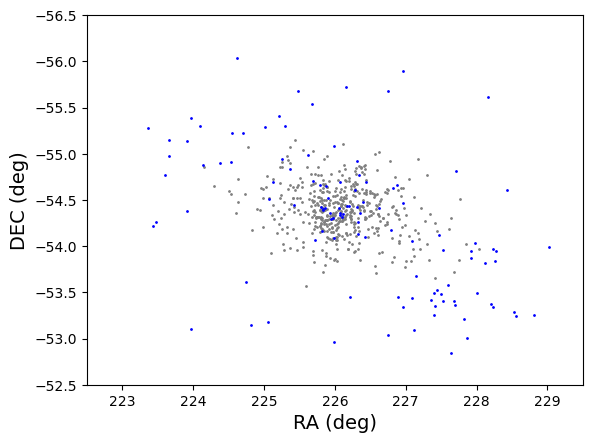

In [87]:
fig, ax = plt.subplots()

ax.scatter(population2.RA_ICRS, population2.DE_ICRS, s=1, c='grey')
ax.scatter(population2_lost.RA_ICRS, population2_lost.DE_ICRS, s=1, c='b')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-52.5,-56.5)
ax.set_xlim(222.5,229.5)

Verifying duplicates.

In [88]:
sky1 = SkyCoord(ra=population2.RA_ICRS, dec=population2.DE_ICRS,unit='degree')
sky2 = SkyCoord(ra=population2_lost.RA_ICRS, dec=population2_lost.DE_ICRS,unit='degree')

# Fazer o crossmatch
idx, d2d, _ = sky2.match_to_catalog_sky(sky1)

# Definir uma tolerância máxima para duplicatas
max_sep = 1.0 * u.arcsec
duplicates = d2d < max_sep

In [89]:
duplicates

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

(222.5, 229.5)

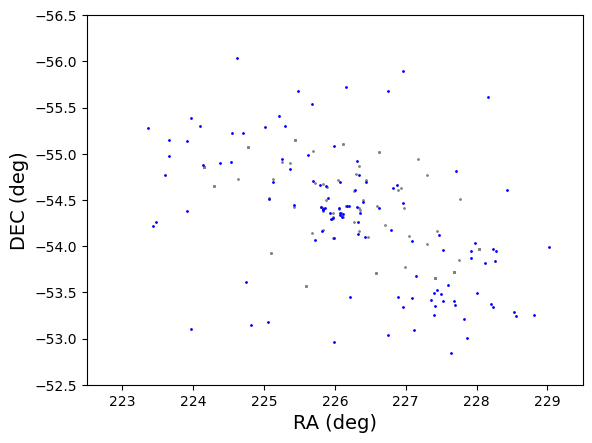

In [90]:
fig, ax = plt.subplots()

ax.scatter(population2.iloc[idx].RA_ICRS, population2.iloc[idx].DE_ICRS, s=1, c='grey')
ax.scatter(population2_lost.RA_ICRS, population2_lost.DE_ICRS, s=1, c='b')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
ax.set_ylim(-52.5,-56.5)
ax.set_xlim(222.5,229.5)

As expected, we have no duplicates in the limit of 1armin of separation. So we join the two catalogues to make one single.

In [91]:
#combined_catalog2 = pd.concat([population2, population2_lost], ignore_index=True)
#combined_catalog2.to_csv('Catalogues/NGC5822_GMM_Population2.csv', index=False)

In [25]:
#population1_lost.to_csv('../Catalogues/NGC5822_population1_lost.csv', index=False)
#population2_lost.to_csv('../Catalogues/NGC5822_population2_lost.csv', index=False)